<a href="https://colab.research.google.com/github/Plenue/Jee-Rank-Predictor/blob/master/RankPredictor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.models import model_from_json
import tensorflow as tf
import datetime
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [0]:
model = Sequential()

In [0]:
def fit_lstm(trainin, trainout, testin, testout, batch_size, nb_epoch, neurons):
  model.add(LSTM(neurons, activation='relu', input_shape=(31,1)))
  model.add(Dense(144))
  model.compile(optimizer='adam', loss='mse')
  train_rmse, test_rmse = list(), list()
  for i in range(nb_epoch):
    model.fit(trainin, trainout, epochs=1, validation_split=0, batch_size=1)
    model.reset_states()
    # evaluate model on train data
    train_rmse.append(trainevaluate(model, trainin, trainout, 1))
    model.reset_states()
    # evaluate model on test data
    test_rmse.append(testevaluate(model, testin, testout,  1))
    model.reset_states()
  history = pd.DataFrame()
  history['train'], history['test'] = train_rmse, test_rmse
  return history

In [0]:
def trainevaluate(model, X, Y, batch):
  # forecast dataset
  x = X[0,:,:]
  x =  x.reshape(1,31,1)
  print("train")

  output = model.predict(x, batch_size=batch)
  # evaluate loss
  err = output-Y[0,:]
  err = np.square(err)
  err = np.sum(err)
  err = np.sqrt(err)/144
  return err

In [0]:
def testevaluate(model, X, Y, batch):
  # forecast dataset
  x =  X.reshape(1,31,1)
  print("test")

  output = model.predict(x, batch_size=batch)
  # evaluate loss
  err = output-Y
  err = np.square(err)
  err = np.sum(err)
  err = np.sqrt(err)/144
  return err

In [0]:
def modelPredict(model, X):
  return model.predict(X, verbose=0)

In [0]:
def run():
  #load Dataset from GDrive on Colab
  url1 = '/content/drive/My Drive/JeeRank/Dataset2014.csv'
  url2 = '/content/drive/My Drive/JeeRank/Dataset2016.csv'
  url3 = '/content/drive/My Drive/JeeRank/Dataset2017.csv'
  url4 = '/content/drive/My Drive/JeeRank/Dataset2018.csv'
  url5 = '/content/drive/My Drive/JeeRank/dataset2013.csv'

  #Preparing Individual Data
  data13= pd.read_csv(url5)
  din13= np.array(data13.drop(['OUT'],axis = 1))
  din13 = din13[1,:].reshape(31,1)
  dout13= (np.array(data13.OUT).T)/360

  data14= pd.read_csv(url1)
  din14= np.array(data14.drop(['IN'],axis = 1))
  din14 = din14[1,:].reshape(31,1)
  dout14= (np.array(data14.IN[0:144]).T)/360

  data16= pd.read_csv(url2)
  din16= np.array(data16.drop(['IN'],axis = 1))
  din16 = din16[1,:].reshape(31,1)
  dout16= (np.array(data16.IN[0:144]).T)/372

  data17= pd.read_csv(url3)
  din17= np.array(data17.drop(['IN'],axis = 1))
  din17 = din17[1,:].reshape(31,1)
  dout17= (np.array(data17.IN[0:144]).T)/366

  data18= pd.read_csv(url4)
  din18= np.array(data18.drop(['IN'],axis = 1))
  din18 = din18[1,:].reshape(31,1)
  dout18= (np.array(data18.IN[0:144]).T)/360

    #Preparing Training/Testing Data
  dintrain = np.stack((din13, din14, din17,din18))
  dintest = np.stack(din16)

  douttest = list()
  douttrain = list()
  douttrain.append(dout13)
  douttrain.append(dout14)
  douttrain.append(dout17)
  douttrain.append(dout18)
  douttrain = np.array(douttrain)
  douttest.append(dout16)
  douttest = np.array(douttest)

  neurons = 50
  nb_epoch = 50
  batch= 1
  repeats = 10
  for i in range(repeats):
    history = fit_lstm(dintrain, douttrain, dintest, douttest, batch, nb_epoch, neurons)
    plt.plot(history['train'], color='blue')
    plt.plot(history['test'], color='orange')
  print('%d) TrainRMSE=%f, TestRMSE=%f' % (i, history['train'].iloc[-1], history['test'].iloc[-1]))
  plt.show()

Epoch 1/1
4/4 [==============================] - 0s 90ms/step - loss: 0.2864
train
test
Epoch 1/1
4/4 [==============================] - 0s 13ms/step - loss: 0.2316
train
test
Epoch 1/1
4/4 [==============================] - 0s 14ms/step - loss: 0.2049
train
test
Epoch 1/1
4/4 [==============================] - 0s 12ms/step - loss: 0.1776
train
test
Epoch 1/1
4/4 [==============================] - 0s 12ms/step - loss: 0.1422
train
test
Epoch 1/1
4/4 [==============================] - 0s 15ms/step - loss: 0.1085
train
test
Epoch 1/1
4/4 [==============================] - 0s 14ms/step - loss: 0.0830
train
test
Epoch 1/1
4/4 [==============================] - 0s 11ms/step - loss: 0.0582
train
test
Epoch 1/1
4/4 [==============================] - 0s 12ms/step - loss: 0.0407
train
test
Epoch 1/1
4/4 [==============================] - 0s 10ms/step - loss: 0.0317
train
test
Epoch 1/1
4/4 [==============================] - 0s 10ms/step - loss: 0.0268
train
test
Epoch 1/1
4/4 [=================

ValueError: ignored

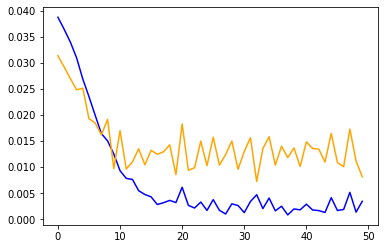

In [168]:
run()